In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')

### Preprocessing di "movies.csv"

In [61]:
df = pd.read_csv('../dataset/movies.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [62]:
# rinomino la colonna 'name' in 'title'
df = df.rename(columns={'name': 'title'})

# rimuovo le colonne 'relesead' e 'writer'
df = df.drop(['released', 'writer'], axis=1)

# rimuovo le righe con budget e gross nulli
df = df[(df['budget'].notnull()) & (df['gross'].notnull())]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5436 entries, 0 to 7652
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   score     5436 non-null   float64
 5   votes     5436 non-null   float64
 6   director  5436 non-null   object 
 7   star      5436 non-null   object 
 8   country   5435 non-null   object 
 9   budget    5436 non-null   float64
 10  gross     5436 non-null   float64
 11  company   5434 non-null   object 
 12  runtime   5435 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 594.6+ KB


In [63]:
# aggiungo in testa una colonna 'id' con un indice progressivo per ogni film
df.insert(0, 'id', range(1, 1 + len(df)))

In [64]:
# visualizzo le righe senza rating
df[df['rating'].isnull()]

,id,title,rating,genre,year,score,votes,director,star,country,budget,gross,company,runtime
505,286,Nausicaä of the Valley of the Wind,NaN,Animation,1984,8.1,157000.0,Hayao Miyazaki,Sumi Shimamoto,Japan,1000000.0,8736506.0,Nibariki,117.0
1852,1011,Y Tu Mamá También,NaN,Drama,1991,7.6,118000.0,Alfonso Cuarón,Maribel Verdú,Mexico,2000000.0,33616692.0,Anhelo Producciones,106.0
2311,1305,Return of the Living Dead III,NaN,Horror,1993,5.9,14000.0,Brian Yuzna,Kent McCord,United States,2000000.0,54207.0,Bandai Visual Company,97.0
2313,1307,Jason Goes to Hell: the Final Friday,NaN,Fantasy,1993,4.2,29000.0,Adam Marcus,John D. LeMay,United States,3000000.0,15935068.0,New Line Cinema,87.0
2417,1380,Madadayo,NaN,Drama,1993,7.3,5100.0,Akira Kurosawa,Tatsuo Matsumura,Japan,11900000.0,596.0,DENTSU Music And Entertainment,134.0
3114,1868,Happy Together,NaN,Drama,1997,7.7,25000.0,Kar-Wai Wong,Leslie Cheung,Hong Kong,4200000.0,585773.0,Block 2 Pictures,96.0
3446,2102,Eyes Wide Shut,NaN,Drama,1999,7.4,313000.0,Stanley Kubrick,Tom Cruise,United Kingdom,65000000.0,162242684.0,Warner Bros.,159.0
3817,2408,Brother,NaN,Crime,2000,7.1,22000.0,Takeshi Kitano,Takeshi Kitano,United States,10000000.0,15250594.0,Recorded Picture Company (RPC),114.0
3890,2471,Monster's Ball,NaN,Drama,2001,7.0,84000.0,Marc Forster,Billy Bob Thornton,United States,4000000.0,45011434.0,Lee Daniels Entertainment,111.0
3944,2520,Ichi the Killer,NaN,Action,2001,7.0,53000.0,Takashi Miike,Tadanobu Asano,Japan,1400000.0,80631.0,Omega Project,129.0


In [65]:
# riempio i valori nulli della colonna 'rating'
df.loc[df['title'] == 'Nausicaä of the Valley of the Wind', 'rating'] = 'PG'
df.loc[df['title'] == 'Y Tu Mamá También', 'rating'] = 'R'
df.loc[df['title'] == 'Return of the Living Dead III', 'rating'] = 'R'
df.loc[df['title'] == 'Jason Goes to Hell: the Final Friday', 'rating'] = 'R'
df.loc[df['title'] == 'Madadayo', 'rating'] = 'Unrated'
df.loc[df['title'] == 'Happy Together', 'rating'] = 'PG-13'
df.loc[df['title'] == 'Eyes Wide Shut', 'rating'] = 'R'
df.loc[df['title'] == 'Brother', 'rating'] = 'R'
df.loc[df['title'] == 'Monster\'s Ball', 'rating'] = 'R'
df.loc[df['title'] == 'Ichi the Killer', 'rating'] = 'R'
df.loc[df['title'] == '31', 'rating'] = 'R'
df.loc[df['title'] == 'Clinton Road', 'rating'] = 'Unrated'

In [66]:
# imposto 'Unrated' per tutte le colonne che hanno valore 'Not Rated'
df.loc[df['rating'] == 'Not Rated', 'rating'] = 'Unrated'

In [67]:
# riempio i valori nulli della colonna 'country'
df.loc[df['title'] == 'Clinton Road', 'country'] = 'United States'

# riempio i valori nulli della colonna 'company'
df.loc[df['title'] == 'The Bear', 'company'] = 'Emabassy Pictures'
df.loc[df['title'] == 'Heart of Dixie', 'company'] = 'Orion Pictures'

# riempio i valori nulli della colonna 'runtime'
df.loc[df['title'] == 'One for the Money', 'runtime'] = 91

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5436 entries, 0 to 7652
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5436 non-null   int64  
 1   title     5436 non-null   object 
 2   rating    5436 non-null   object 
 3   genre     5436 non-null   object 
 4   year      5436 non-null   int64  
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   star      5436 non-null   object 
 9   country   5436 non-null   object 
 10  budget    5436 non-null   float64
 11  gross     5436 non-null   float64
 12  company   5436 non-null   object 
 13  runtime   5436 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 637.0+ KB


In [68]:
# verifico che non ci siano duplicati
df.duplicated().sum()

0

In [69]:
df.to_csv('../dataset/movies_v2.csv', index=False)

In [70]:
df = pd.read_csv('../dataset/movies_v2.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5436 non-null   int64  
 1   title     5436 non-null   object 
 2   rating    5436 non-null   object 
 3   genre     5436 non-null   object 
 4   year      5436 non-null   int64  
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   star      5436 non-null   object 
 9   country   5436 non-null   object 
 10  budget    5436 non-null   float64
 11  gross     5436 non-null   float64
 12  company   5436 non-null   object 
 13  runtime   5436 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 594.7+ KB


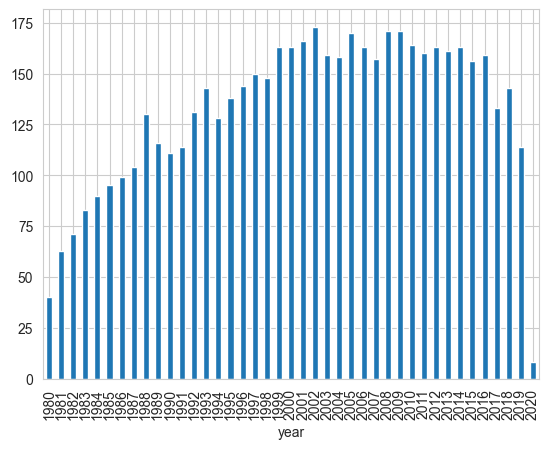

In [71]:
# studio la distribuzione di 'year'
df['year'].value_counts().sort_index().plot.bar()
plt.show()

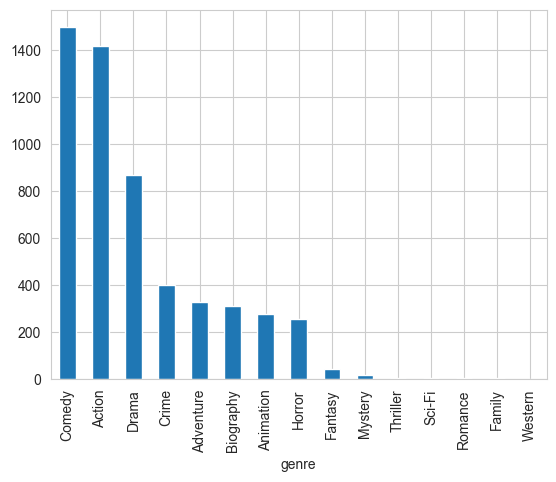

In [72]:
# studio la distribuzione di 'genre'
df['genre'].value_counts().plot.bar()
plt.show()

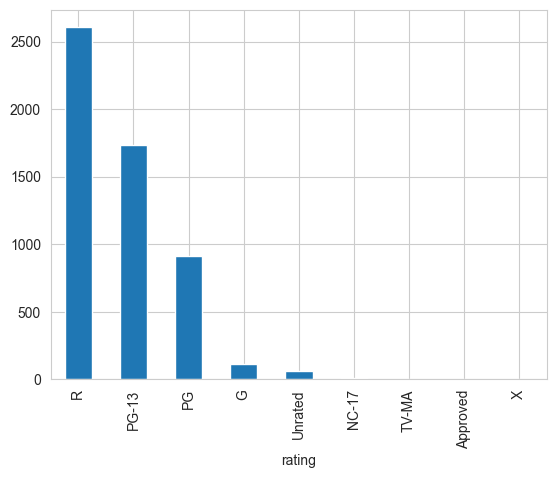

In [73]:
# studio la distribuzione di 'rating'
df['rating'].value_counts().plot.bar()
plt.show()

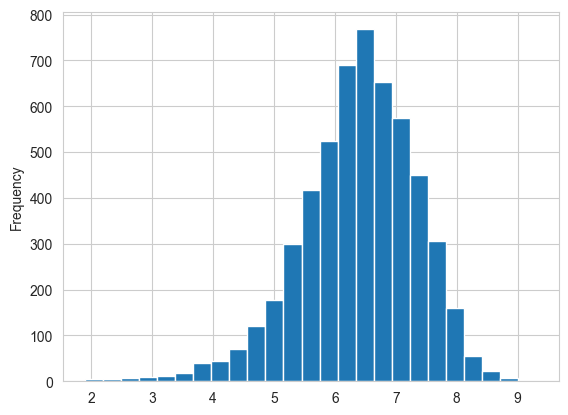

count    5436.000000
mean        6.392642
std         0.963200
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

In [74]:
# studio la distribuzione di 'score'
df['score'].plot.hist(bins=25)
plt.show()
df['score'].describe()

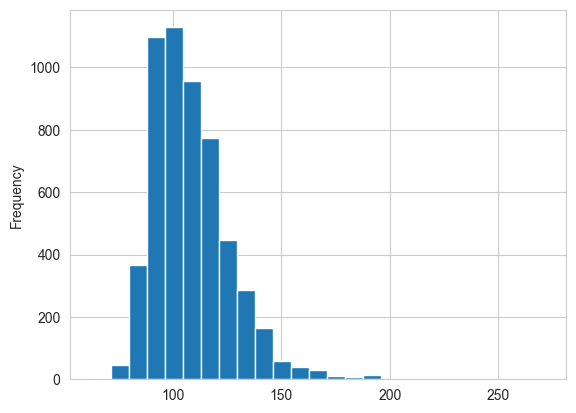

count    5436.000000
mean      108.153238
std        18.121228
min        63.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       271.000000
Name: runtime, dtype: float64

In [75]:
# studio la distribuzione di 'runtime'
df['runtime'].plot.hist(bins=25)
plt.show()
df['runtime'].describe()

In [76]:
# funzione che applica una trasformazione logaritmica alla colonna in input e arrotonda il risultato a 2 cifre decimali
def log_transformation(column):
    return np.round(np.log(column), 2)

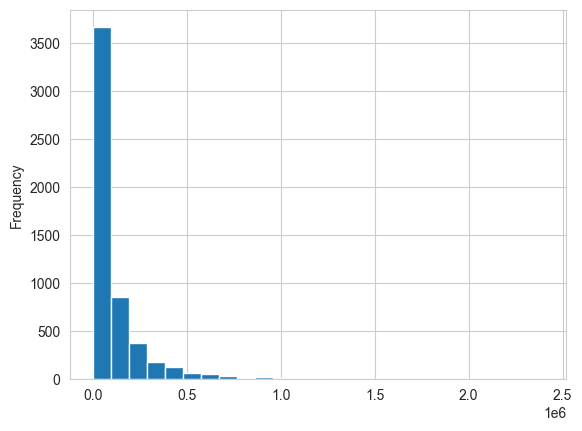

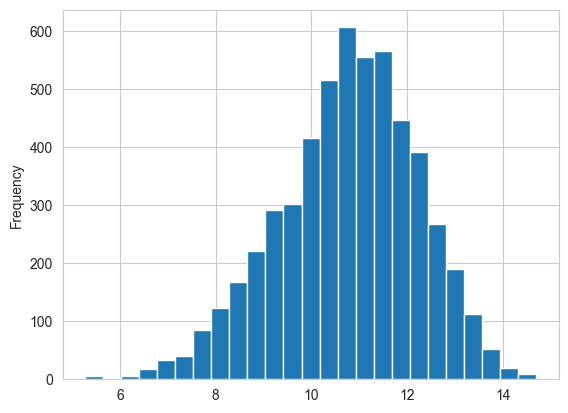

In [77]:
# studio la distribuzione di 'votes'
df['votes'].plot.hist(bins=25)
plt.show()

# applico una trasformazione logaritmica per normalizzare i dati
df['votes_log'] = df['votes'].apply(log_transformation)
df['votes_log'].plot.hist(bins=25)
plt.show()

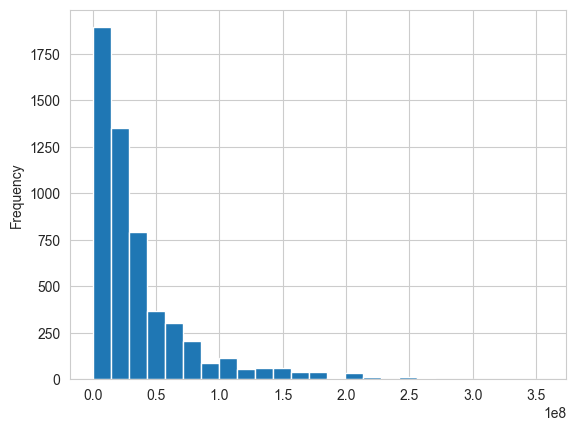

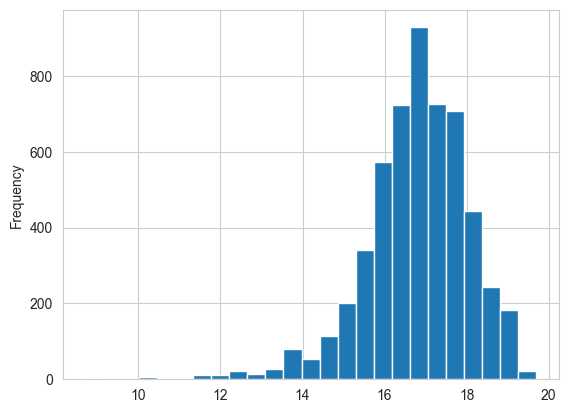

In [78]:
# studio la distribuzione di 'budget'
df['budget'].plot.hist(bins=25)
plt.show()

# applico una trasformazione logaritmica per normalizzare i dati
df['budget_log'] = df['budget'].apply(log_transformation)
df['budget_log'].plot.hist(bins=25)
plt.show()

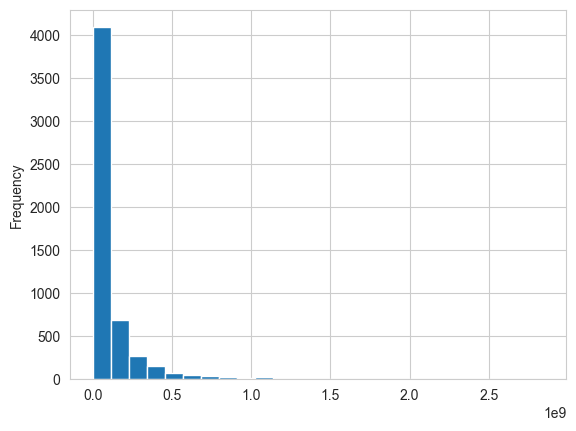

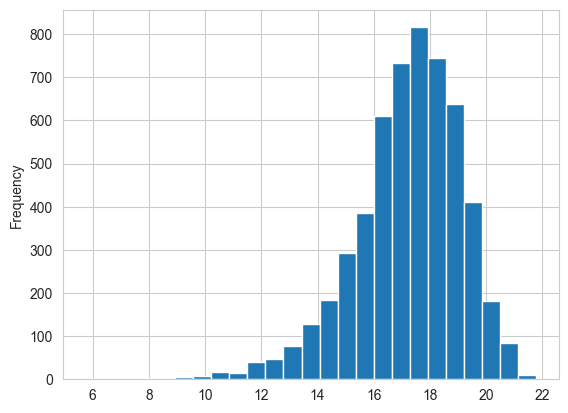

In [79]:
# studio la distribuzione di 'gross'
df['gross'].plot.hist(bins=25)
plt.show()

# applico una trasformazione logaritmica per normalizzare i dati
df['gross_log'] = df['gross'].apply(log_transformation)
df['gross_log'].plot.hist(bins=25)
plt.show()

In [80]:
# salvo il nuovo dataset in 'movies_v3.csv'
df.to_csv('../dataset/movies_v3.csv', index=False)